In [2]:
%pylab
%matplotlib inline


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
from sdca import *
from sklearn import svm
from sklearn import preprocessing


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
def run_small_experiment(X,y,A_in,lambd,passes,plotname,primal_opt = -1,primal_accuracy = False):
    num = 4
    rep = 4
    N,d = A_in.shape
    #if primal_opt == -1:
    #    clf = svm.LinearSVC(loss = 'hinge', C = 1.0/(N*lambd),fit_intercept=False, tol=1e-6, max_iter=N*passes*20)
    #    clf.fit(X, y)
    #    primal_opt =  primal_func(clf.coef_,A_in,lambd)
    
    
    print("primal_obj[opt]={}".format(primal_opt))
    main_opt = 0
    for i in range(num):
        n = int(1.0*N/(power(2,i)))
        print("n:{}".format(n))
        inds = np.random.randint(N, size=n);
        A = np.zeros((n,d))
        A = A_in[inds,:]
        X_sub = X[inds,:]
        y_sub = y[inds]
        lambd = 1.0/n
        
        clf = svm.LinearSVC(loss = 'hinge', C = 1.0, tol = 0.00000001, max_iter = 100000000, fit_intercept=False)
        clf.fit(X_sub, y_sub)
        primal_opt =  primal_func(clf.coef_,A,lambd)
        print('primal[{}] = {}'.format(n,primal_opt))
       # (alpha_s,stats_s,w_s) = svm_randomperm( A, lambd, passes*200, obj = dual_obj)
       # primal_opt = primal_func(w_s,A,lambd)
        print("primal obj={}".format(primal_opt))
        if i == 1: 
            main_opt = primal_opt
        def dist_opt(w,alpha,A,lambd):
          if primal_accuracy == True: 
            return primal_func(w,A,lambd) - primal_opt
          return primal_opt - dual_obj(w, alpha,A,lambd)
            #da = 0
            #for i in range(n): 
            #    if alpha[i] <= 1 and alpha[i] >= 0:
            #        da = da + alpha[i]
            #    else:
            #        da = da + float("inf")
            #da = da / n 
            #da = da - 0.5*lambd*np.square(((1.0*n)/N)*np.linalg.norm(w_alpha(alpha,A,lambd)))
            #return primal_opt - da
#         (alpha_n,stats_n,w_n) =svm_randomperm( A, 1.0/n, passes*power(2,i), obj = dist_opt)
#         t_randomperm, f_randomperm = get_data_plot(stats_n)  
#         converge_rate = f_randomperm
#         for cc in range(rep):
#           (alpha_n,stats_n,w_n) =svm_randomperm( A, lambd, passes*power(2,i), obj = dist_opt)
#           t_randomperm, f_randomperm = get_data_plot(stats_n)
#           converge_rate = np.add(converge_rate,f_randomperm)
#         converge_rate = np.divide(converge_rate,rep)
#         t_randomperm = np.multiply(t_randomperm,n)
#         plabel = "size=%i" % n
#         plt.plot(t_randomperm,np.log(f_randomperm),label = plabel, marker='o')
#     lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
#     plt.savefig(plotname, facecolor='w', edgecolor='w',
#         orientation='portrait',  format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [6]:
n = 6000; 
d = 5000; 
import readsvm 
#filename = "../datasets/rcv1_train.binary"
filename = "../datasets/gisette_scale"
y, X = readfile(filename,n,d)
#X = preprocessing.scale(X)
A = np.zeros((n,d))
for i in range(n): 
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 0.01
passes = 6
run_small_experiment(X,y, A,lambd,passes,"plot/gisette_scale_primal.eps",primal_accuracy = True)

primal_obj[opt]=-1
n:6000
primal[6000] = [  7.54103426e-05]
primal obj=[  7.54103426e-05]
n:3000
primal[3000] = [  9.62096750e-05]
primal obj=[  9.62096750e-05]
n:1500
primal[1500] = [ 0.0001202]
primal obj=[ 0.0001202]
n:750
primal[750] = [ 0.00015027]
primal obj=[ 0.00015027]


primal_obj[opt]=-1
n:50101
primal obj=[ 0.34836738]
n:25050
primal obj=[ 0.34381418]
n:12525
primal obj=[ 0.34766485]
n:6262
primal obj=[ 0.3702931]


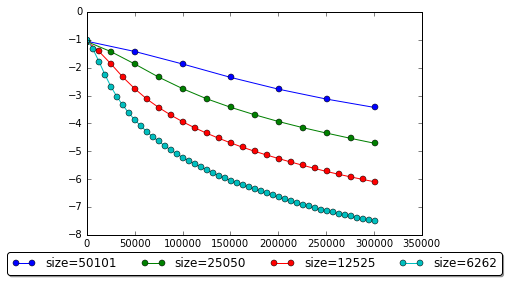

In [5]:
n = 50101; 
d = 54; 
filename = "../datasets/covtype.libsvm.binary.scale"
y, X = readfile(filename,n,d)
A = np.zeros((n,d))
for i in range(n):
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 0.001
passes = 6
run_small_experiment(X,y, A,lambd,passes,"plot/covtype_dual.eps",primal_accuracy = False)

In [ ]:
n = 32561; 
d = 123; 
import readsvm 
#filename = "../datasets/rcv1_train.binary"
filename = "../datasets/a9a"
y, X = readfile(filename,n,d)
#X = preprocessing.scale(X)
A = np.zeros((n,d))
for i in range(n): 
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 0.00001
passes = 6
run_small_experiment(X,y, A,lambd,passes,"plot/a9a_dual.eps",primal_accuracy=False)

In [ ]:
n = 49749; 
d = 300; 
filename = "../datasets/w8a"
y, X = readfile(filename,n,d)
A = np.zeros((n,d))
for i in range(n):
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 1.0/n
passes = 6
run_small_experiment(X,y, A,lambd,passes,"plot/w8a_primal.eps",primal_accuracy = False)

In [ ]:
-